In [1]:
from collections import defaultdict
import scanpy as sc
import scanpy.external as sce


In [2]:
sc.settings.datasetdir

WindowsPath('data')

In [3]:

sc.settings.set_figure_params(dpi=80)
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
# sc.logging.print_versions()

In [45]:
# READ preprocessed counts

adata = sc.read_h5ad("./write/preprocessed_adata_transformed.h5ad")
adata

AnnData object with n_obs × n_vars = 19789 × 1000
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'louvain', 'cell type'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'cell type_colors', 'dendrogram_cell type', 'dendrogram_louvain', 'hvg', 'leiden', 'leiden_colors', 'louvain', 'louvain_colors', 'neighbors', 'pca', 'rank_genes_groups', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'scaled'
    obsp: 'connectivities', 'distances'

**Principal Component Analysis**

PCA reveals the main axes of variation and denoises data

In [51]:
sc.tl.pca(adata, svd_solver='arpack',n_comps=50)

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:04)


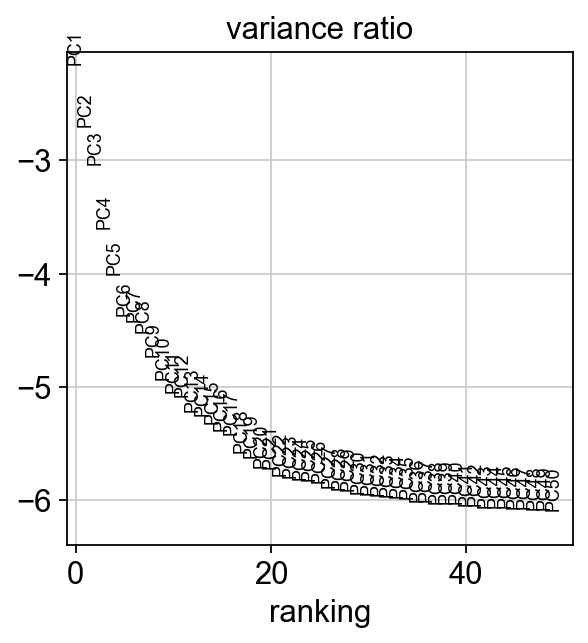

In [52]:
sc.pl.pca_variance_ratio(adata, log=True, n_pcs = 50)

C:\Users\giovanni\anaconda3\envs\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8942 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\giovanni\anaconda3\envs\python39\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8942 missing from current font.
  font.set_text(s, 0, flags=flags)


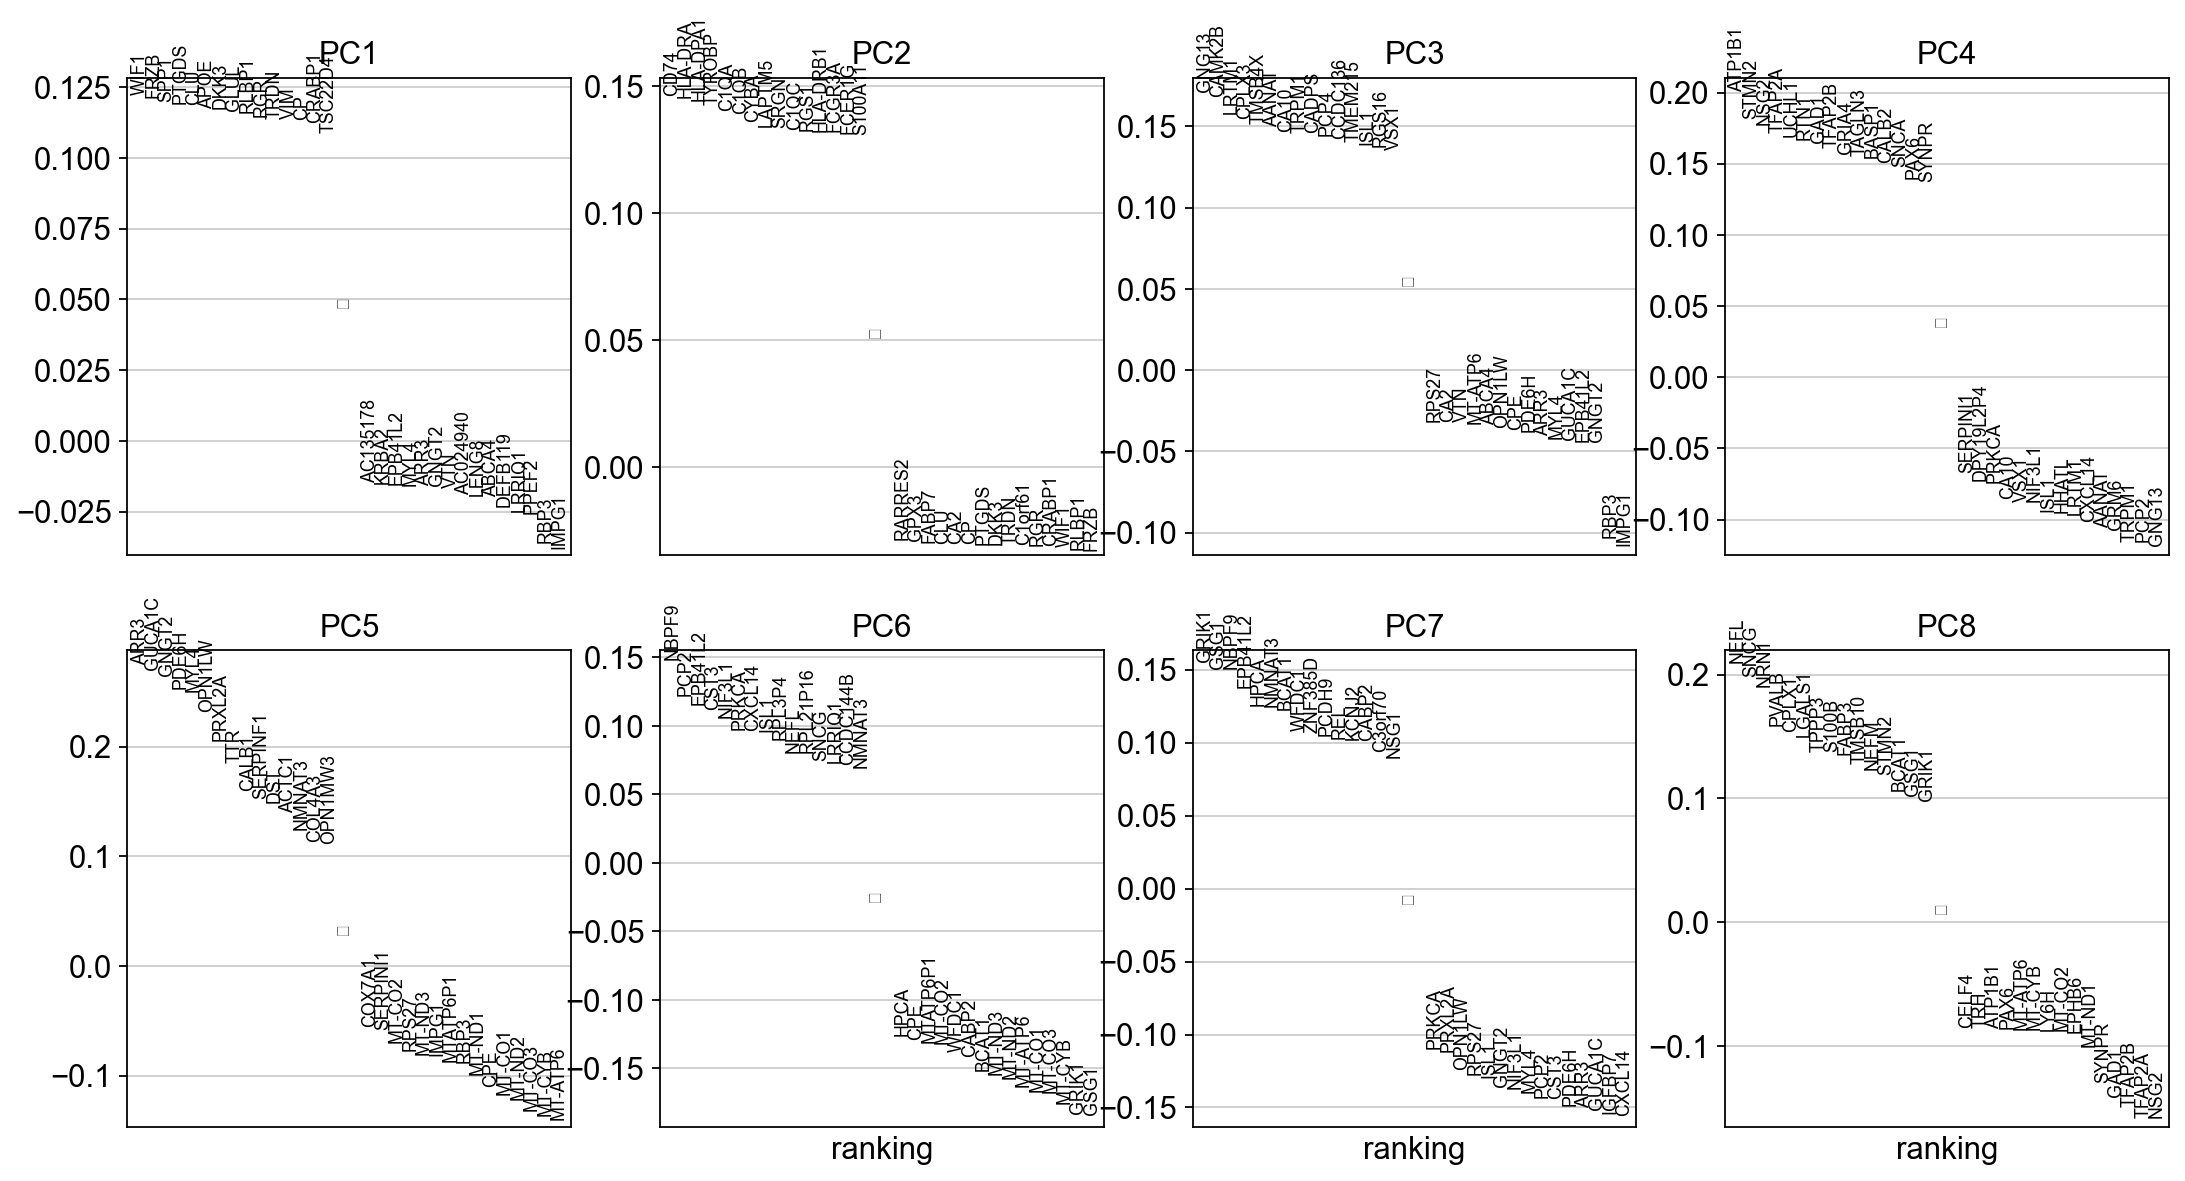

In [53]:
#Plot loadings
sc.pl.pca_loadings(adata, components=[1,2,3,4,5,6,7,8])

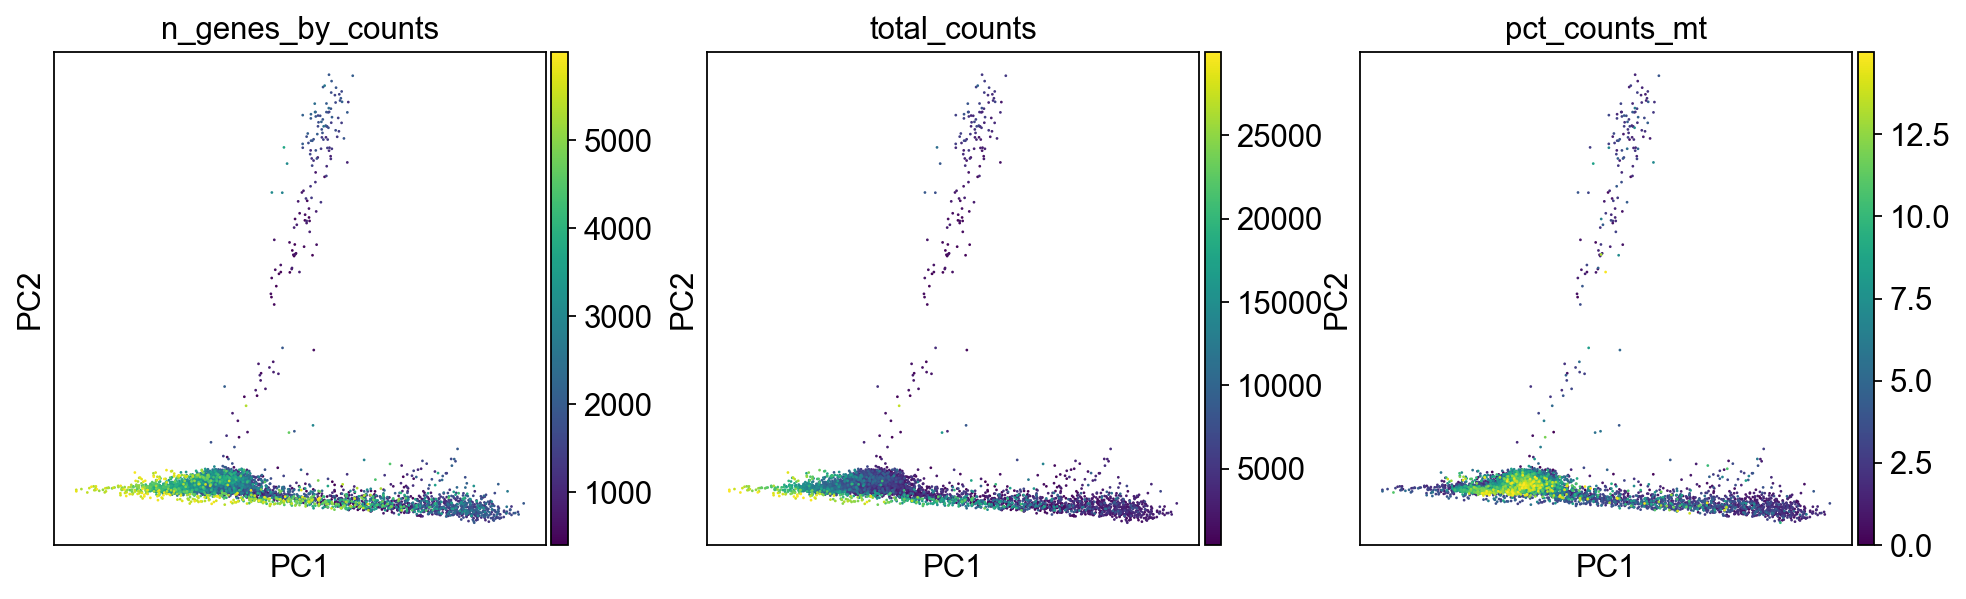

In [46]:
sc.pl.pca(adata, color=['n_genes_by_counts', 'total_counts', 'pct_counts_mt'])

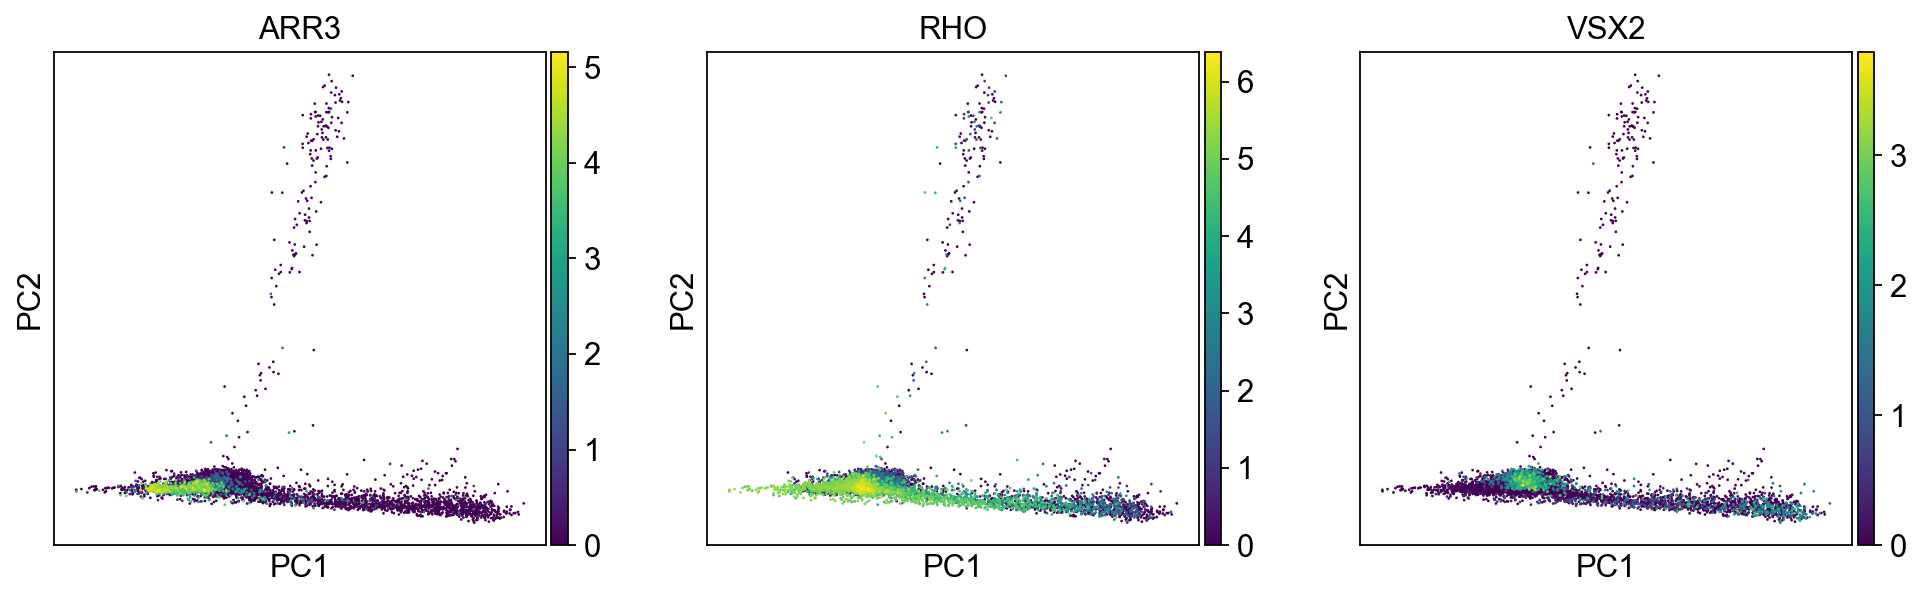

In [47]:
sc.pl.pca(adata, color=['ARR3',"RHO","VSX2"])

**Computing t-SNE**

In [62]:
sc.tl.tsne(adata,
           n_pcs=10,
           perplexity=60,
           early_exaggeration=25,
           learning_rate=1500,
          )

computing tSNE
    using 'X_pca' with n_pcs = 10
    using sklearn.manifold.TSNE


C:\Users\giovanni\anaconda3\envs\python39\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


    finished: added
    'X_tsne', tSNE coordinates (adata.obsm) (0:05:27)


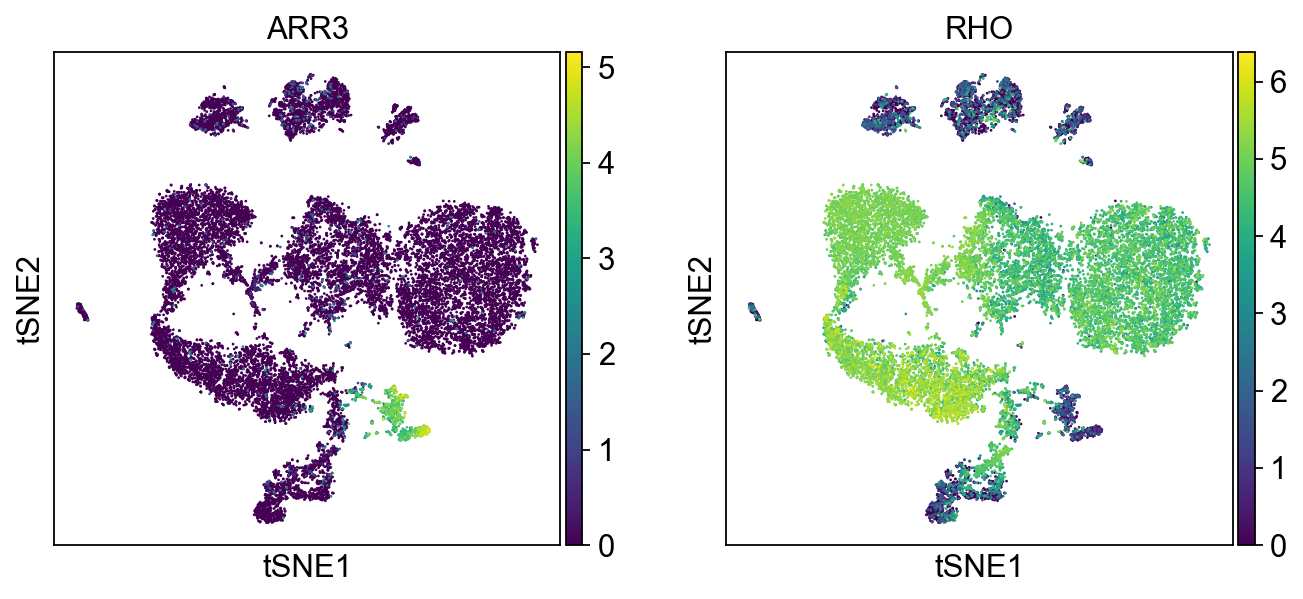

In [63]:
sc.pl.tsne(adata, color=['ARR3','RHO'], legend_loc="on data")

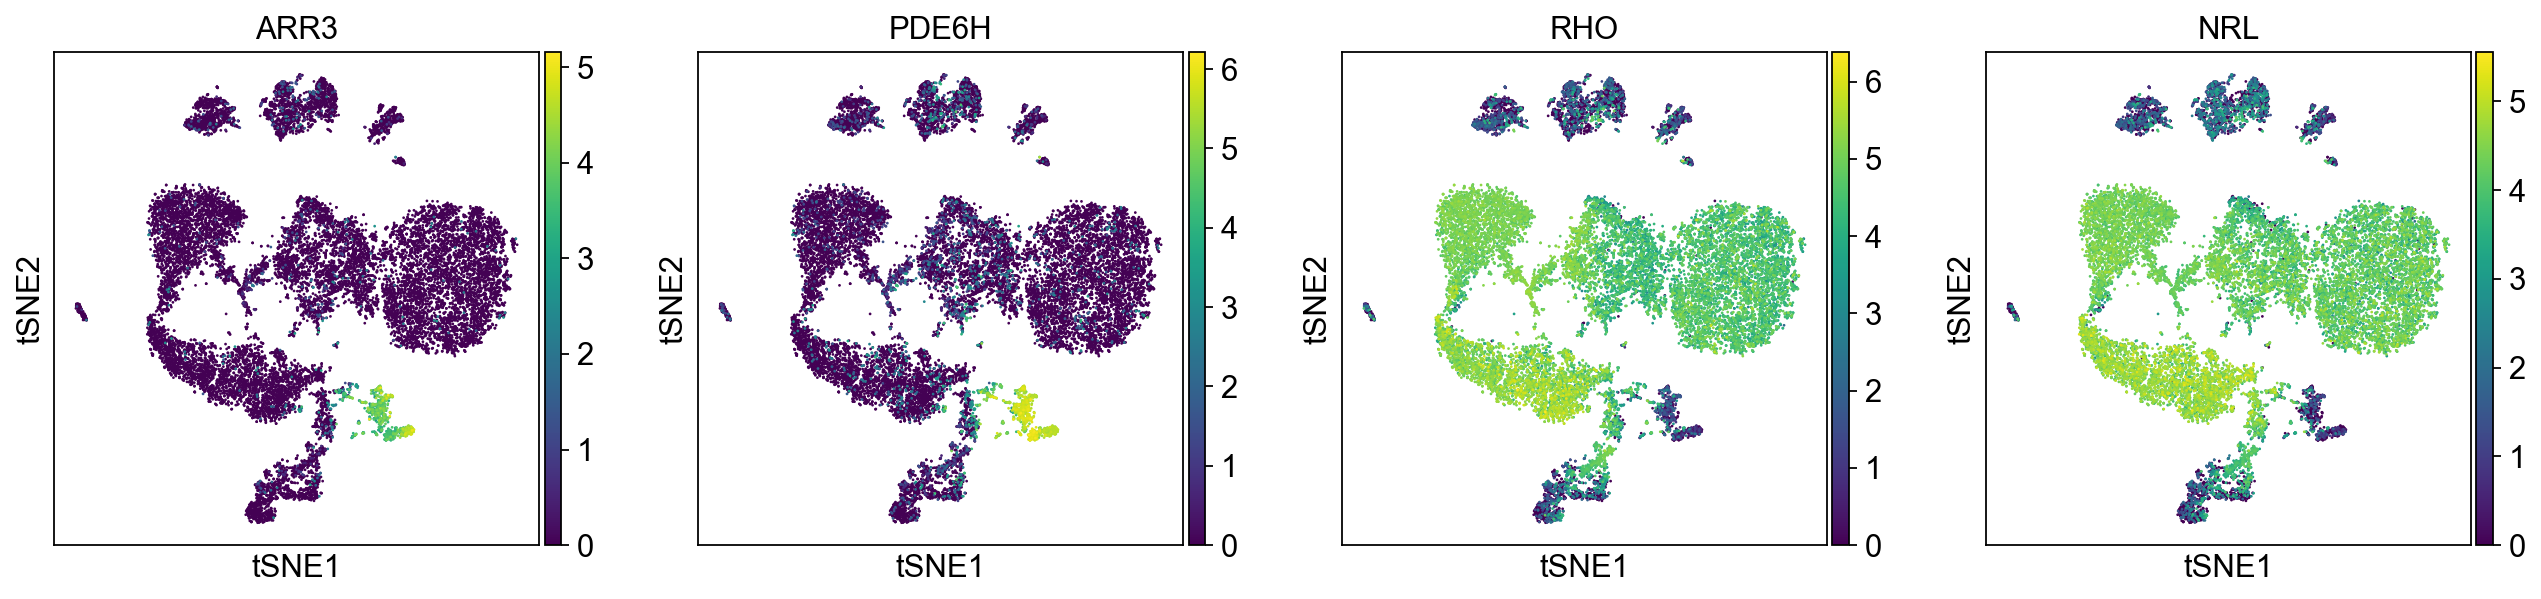

In [64]:
sc.pl.tsne(adata, color=['ARR3', 'PDE6H','RHO', 'NRL'])

**Computing the neighborhood graph**

In [57]:
sc.pp.neighbors(adata, n_neighbors=50, n_pcs=30)

computing neighbors
    using 'X_pca' with n_pcs = 30
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:11)


See how the neighboor graph looks like [time consuming]

In [58]:
sc.tl.draw_graph(adata)

drawing single-cell graph using layout 'fa'
    finished: added
    'X_draw_graph_fr', graph_drawing coordinates (adata.obsm) (0:11:17)


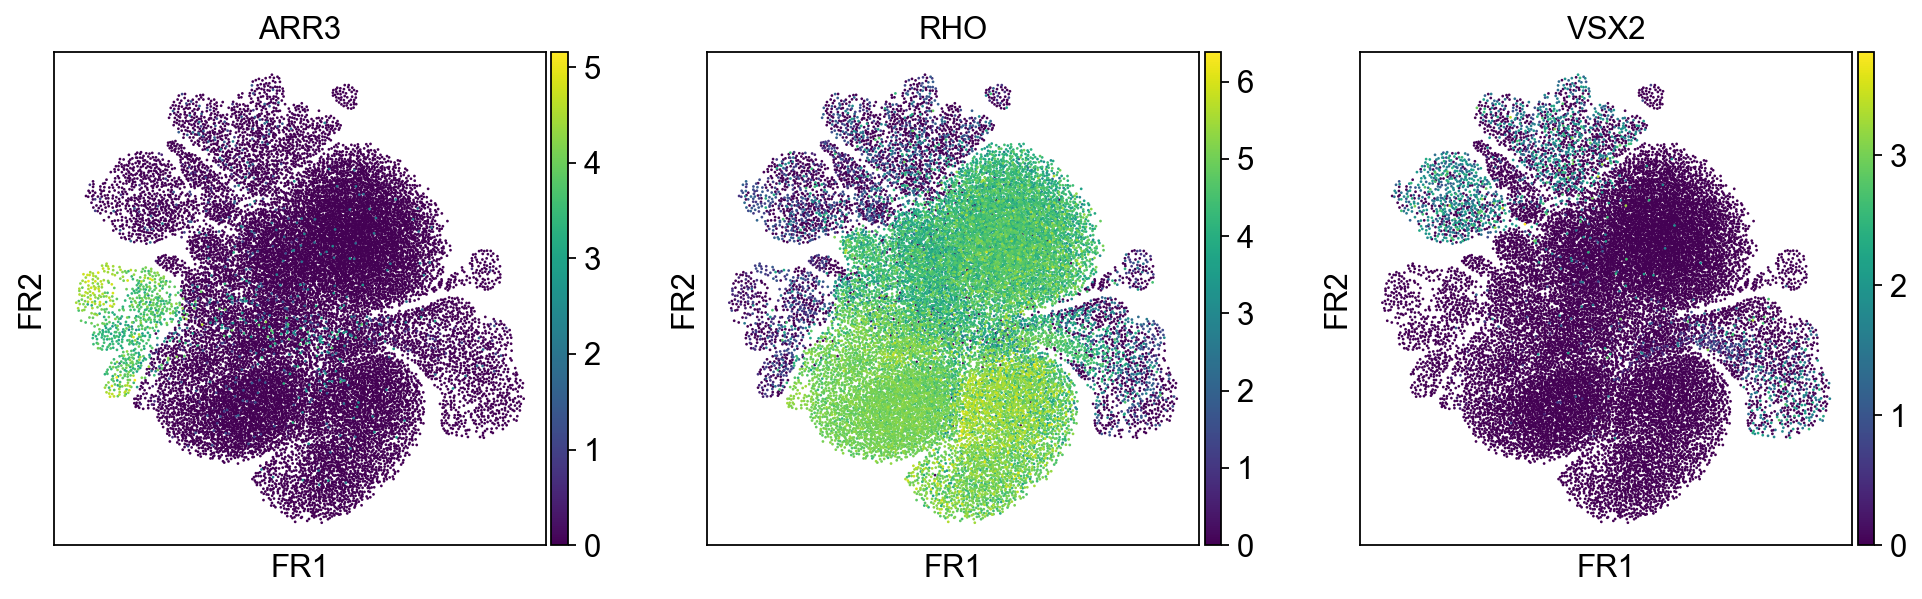

In [59]:
sc.pl.draw_graph(adata, color=['ARR3',"RHO","VSX2"])

Diffusion map [time consuming]

In [60]:
sc.tl.diffmap(adata)

computing Diffusion Maps using n_comps=15(=n_dcs)
computing transitions
    finished (0:00:00)
    eigenvalues of transition matrix
    [1.         0.9983612  0.99684876 0.99383086 0.9930529  0.9913793
     0.98950493 0.98738515 0.9865582  0.98426646 0.9817939  0.98078847
     0.97840416 0.9781899  0.97646594]
    finished: added
    'X_diffmap', diffmap coordinates (adata.obsm)
    'diffmap_evals', eigenvalues of transition matrix (adata.uns) (0:00:02)


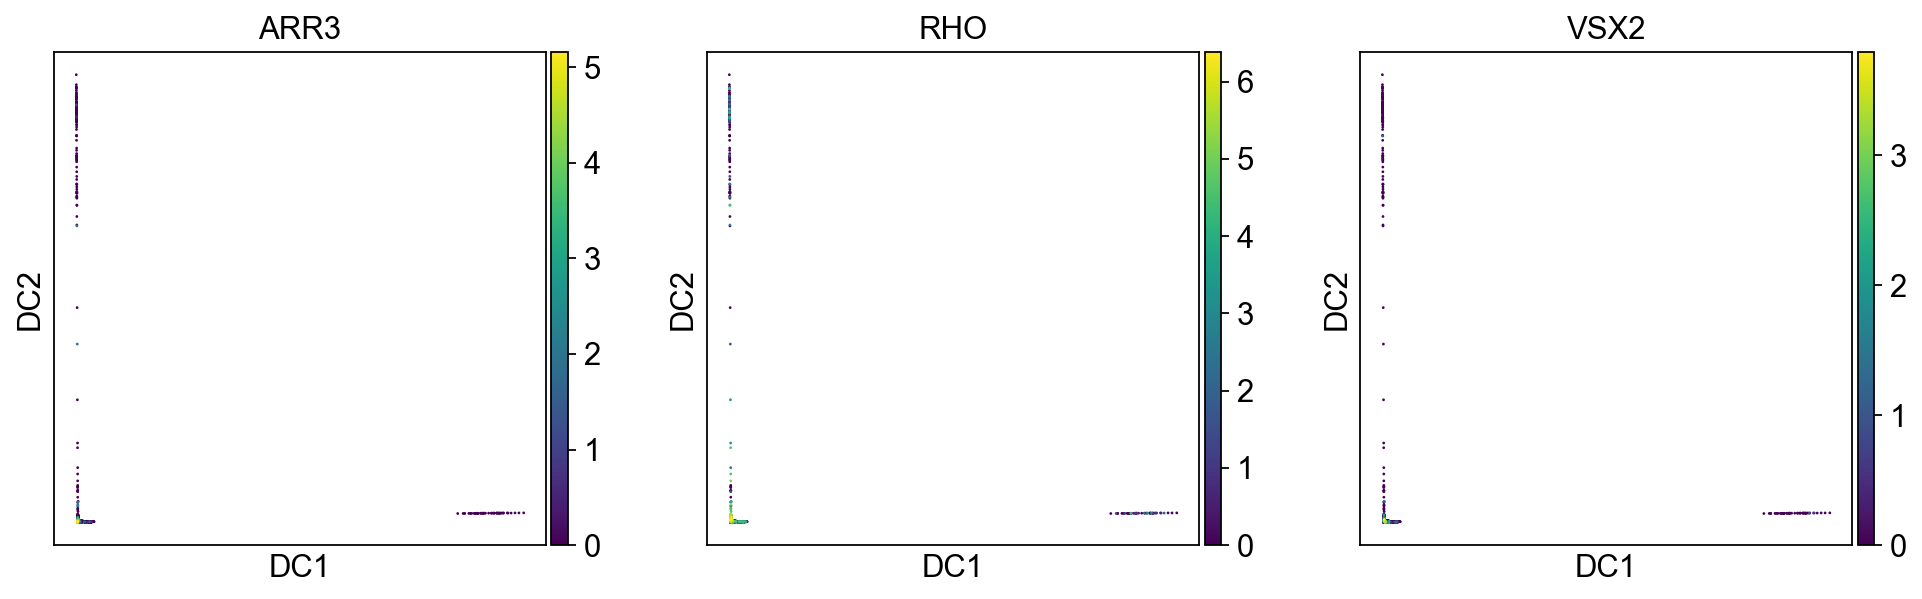

In [61]:
sc.pl.diffmap(adata, color=['ARR3',"RHO","VSX2"])

**Embeding the neighborhood graph in a UMAP**

In [ ]:
sc.tl.umap(adata,
          alpha=1,
          gamma=1)

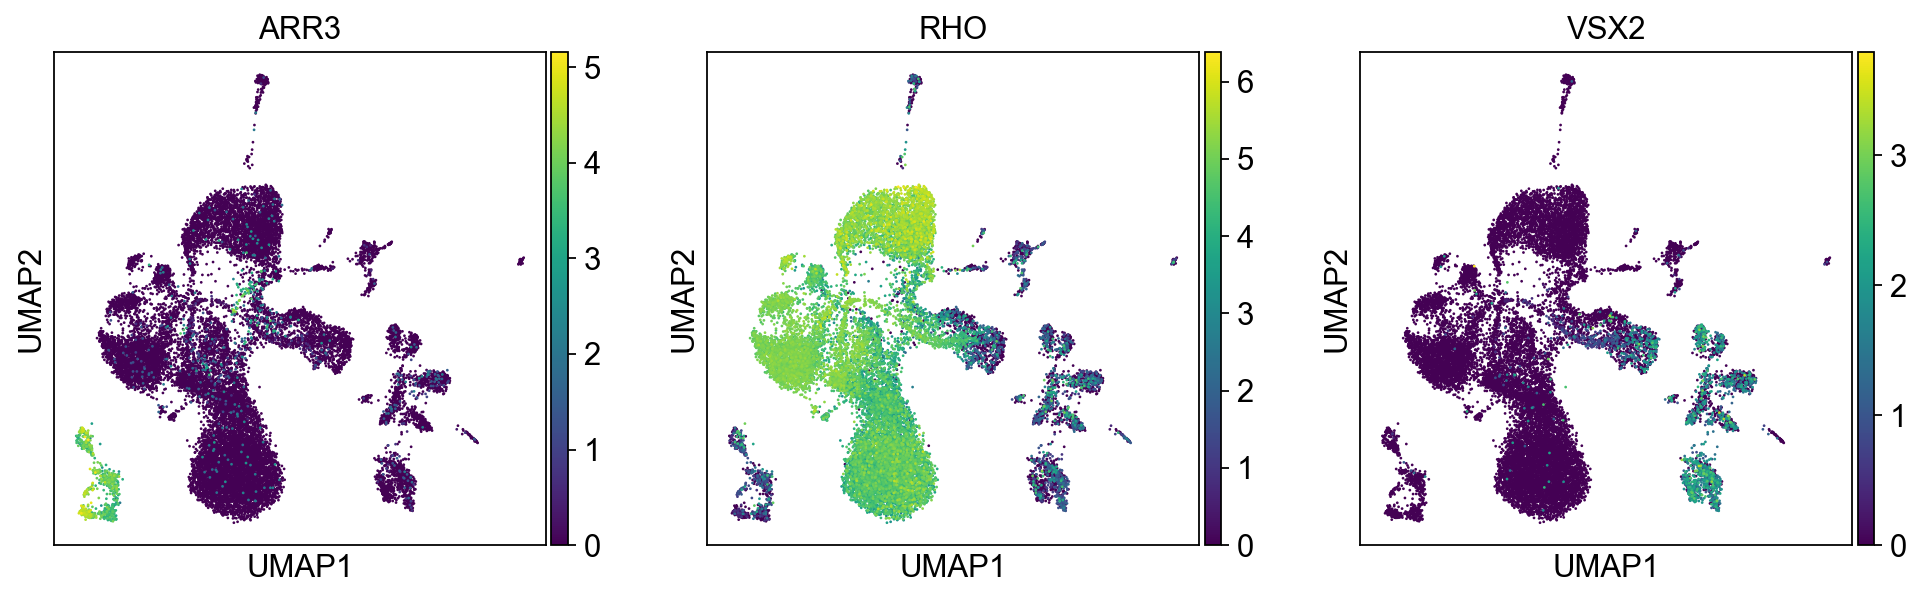

In [50]:
sc.pl.umap(adata, color=['ARR3',"RHO","VSX2"])

Save processed matrix

In [ ]:
adata.write_h5ad('./write/processed_adata.h5ad')